In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 📂 Ruta de la carpeta con los CSV
folder_path = r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data"  # Cambia esto a la ruta correcta

# 🔍 Buscar todos los archivos CSV en la carpeta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 📊 Leer y combinar todos los CSV
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, parse_dates=["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"])
    df_list.append(df)

# 🏗️ Concatenar todos los DataFrames
df_merged = pd.concat(df_list, ignore_index=True)

In [18]:
# 🔍 Ver primeras filas
print("📌 Primeras filas del dataset combinado:")
print(df_merged.head())


📌 Primeras filas del dataset combinado:
  Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss  \
0                                2011-01-21 08:10:26     
1                                2011-01-21 08:15:26     
2                                2011-01-21 08:20:26     
3                                2011-01-21 08:25:26     
4                                2011-01-21 08:35:26     

   POA irradiance CMP22 pyranometer (W/m2)  \
0                                     20.2   
1                                     35.8   
2                                     20.2   
3                                     20.6   
4                                     29.5   

   PV module back surface temperature (degC)  Pmp (W)  \
0                                       19.3   1.9610   
1                                       19.5   3.7242   
2                                       19.5   1.9551   
3                                       19.5   2.0057   
4                                       19.5   3.

In [19]:
# 🔢 Ver información general
print("\n📌 Información del DataFrame:")
print(df_merged.info())


📌 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025599 entries, 0 to 1025598
Data columns (total 11 columns):
 #   Column                                                Non-Null Count    Dtype         
---  ------                                                --------------    -----         
 0   Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss  1025599 non-null  datetime64[ns]
 1   POA irradiance CMP22 pyranometer (W/m2)               1025599 non-null  float64       
 2   PV module back surface temperature (degC)             1025599 non-null  float64       
 3   Pmp (W)                                               1025599 non-null  float64       
 4   Dry bulb temperature (degC)                           1025599 non-null  float64       
 5   Relative humidity (%RH)                               1025599 non-null  float64       
 6   Atmospheric pressure (mb)                             1025599 non-null  float64       
 7   Precipitation (mm) accum

In [20]:
# 📈 Estadísticas generales
print("\n📌 Estadísticas Descriptivas:")
print(df_merged.describe())


📌 Estadísticas Descriptivas:
      Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss  \
count                                            1025599     
mean                       2012-09-06 22:28:40.085733120     
min                                  2011-01-21 08:10:24     
25%                                  2011-09-12 14:30:23     
50%                                  2013-02-05 15:15:01     
75%                                  2013-07-04 16:50:10     
max                                  2014-01-20 16:45:21     
std                                                  NaN     

       POA irradiance CMP22 pyranometer (W/m2)  \
count                             1.025599e+06   
mean                              4.217213e+02   
min                               1.990000e+01   
25%                               1.148000e+02   
50%                               2.988000e+02   
75%                               7.380000e+02   
max                               1.443500e+03   
std        

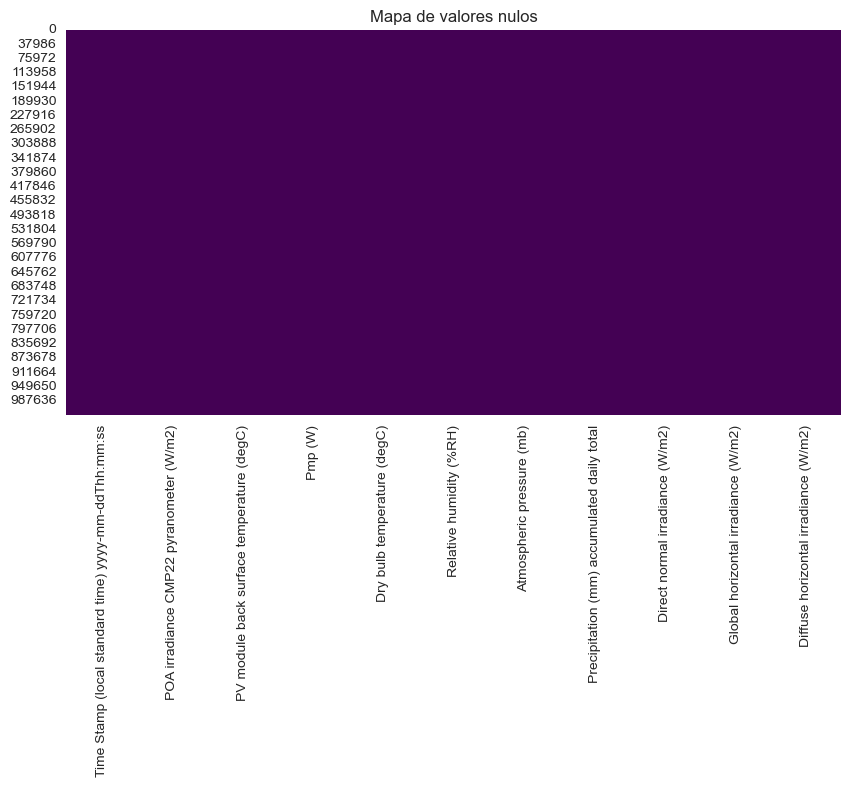

In [21]:
# 📉 Visualizar valores nulos
plt.figure(figsize=(10,5))
sns.heatmap(df_merged.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos")
plt.show()

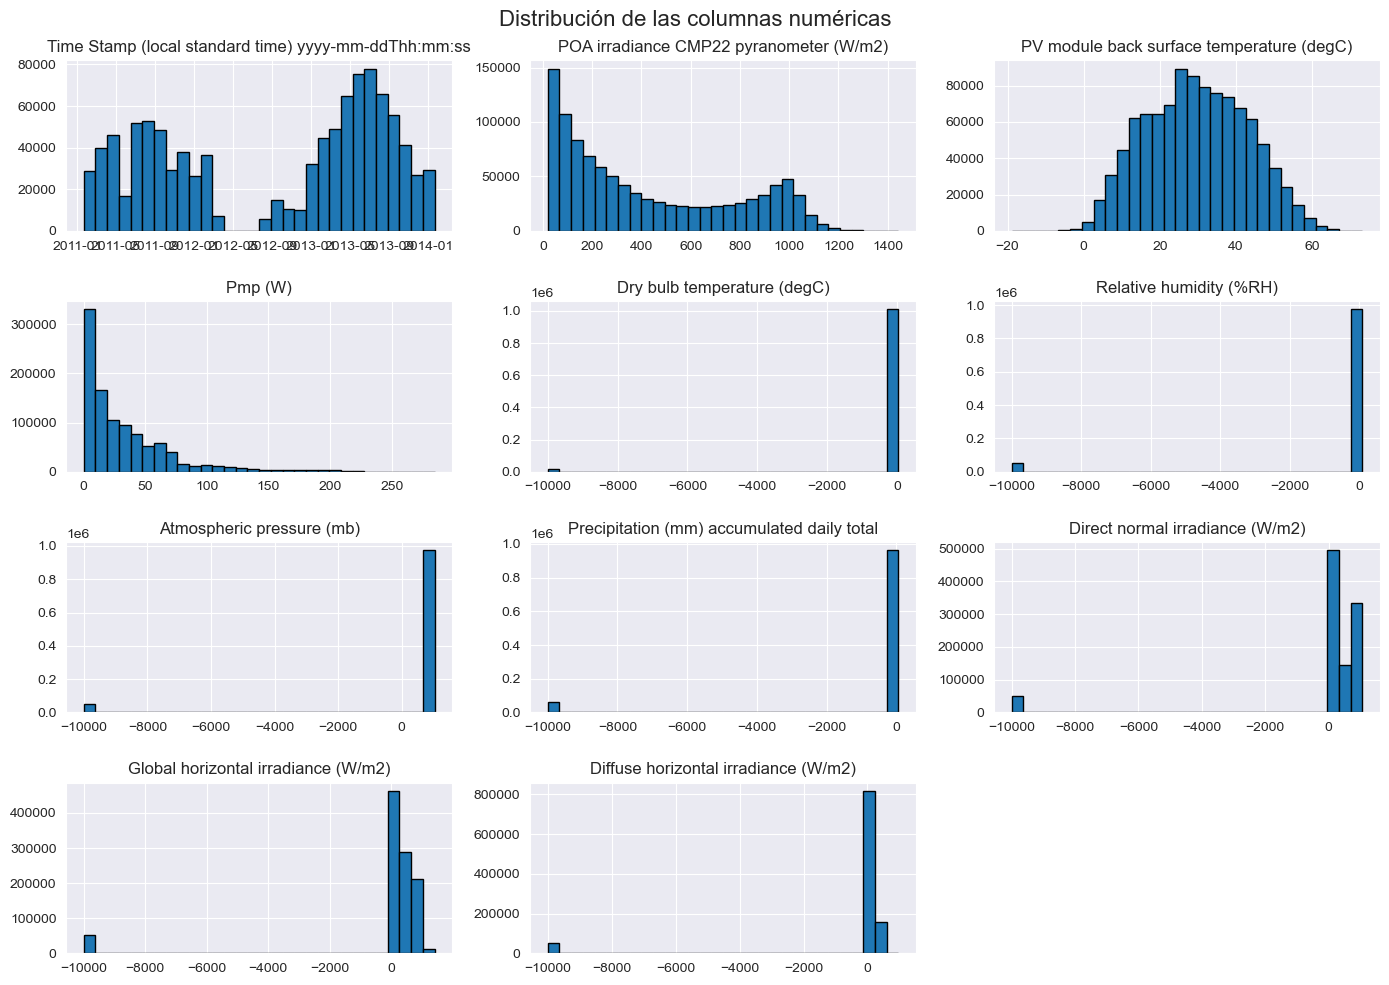

In [23]:
# 📊 Histogramas de cada columna numérica
df_merged.hist(figsize=(14, 10), bins=30, edgecolor="black", layout=(4, 3))  # Ajusta filas y columnas

plt.suptitle("Distribución de las columnas numéricas", fontsize=16)
plt.tight_layout()  # Ajusta los espacios automáticamente
plt.show()

In [24]:
import pandas as pd

# 🔎 Ver los primeros valores
print(df_merged.head())

# 📌 Ver información general
print(df_merged.info())

# 🔢 Revisar estadísticas descriptivas
print(df_merged.describe())

# 🔎 Ver si hay valores negativos en columnas que no deberían tenerlos
cols_check = [
    "POA irradiance CMP22 pyranometer (W/m2)",
    "PV module back surface temperature (degC)",
    "Pmp (W)",
    "Dry bulb temperature (degC)",
    "Relative humidity (%RH)",
    "Atmospheric pressure (mb)",
    "Precipitation (mm) accumulated daily total",
    "Direct normal irradiance (W/m2)",
    "Global horizontal irradiance (W/m2)",
    "Diffuse horizontal irradiance (W/m2)"
]

for col in cols_check:
    print(f"{col}: Valores negativos -> {(df_merged[col] < 0).sum()}")

# 🔍 Ver los valores únicos en la columna de tiempo
print(df_merged["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].unique()[:10])


  Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss  \
0                                2011-01-21 08:10:26     
1                                2011-01-21 08:15:26     
2                                2011-01-21 08:20:26     
3                                2011-01-21 08:25:26     
4                                2011-01-21 08:35:26     

   POA irradiance CMP22 pyranometer (W/m2)  \
0                                     20.2   
1                                     35.8   
2                                     20.2   
3                                     20.6   
4                                     29.5   

   PV module back surface temperature (degC)  Pmp (W)  \
0                                       19.3   1.9610   
1                                       19.5   3.7242   
2                                       19.5   1.9551   
3                                       19.5   2.0057   
4                                       19.5   3.1397   

   Dry bulb temperature (degC) 

# DELETING NEGATIVE VALUES - KNNImputer

In [29]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Carpeta de entrada y salida
input_folder = r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data"
output_folder = r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned"

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Lista de columnas donde los valores negativos deben ser NaN
columns_to_fix = [
    "POA irradiance CMP22 pyranometer (W/m2)",
    "PV module back surface temperature (degC)",
    "Pmp (W)",
    "Dry bulb temperature (degC)",
    "Relative humidity (%RH)",
    "Atmospheric pressure (mb)",
    "Precipitation (mm) accumulated daily total",
    "Direct normal irradiance (W/m2)",
    "Global horizontal irradiance (W/m2)",
    "Diffuse horizontal irradiance (W/m2)"
]

# Procesar cada archivo CSV individualmente
for file_name in os.listdir(input_folder):
    if file_name.endswith(".csv"):  # Asegurar que solo lea archivos CSV
        file_path = os.path.join(input_folder, file_name)
        df = pd.read_csv(file_path)

        # Convertir valores negativos a NaN
        df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)

        # Aplicar KNN Imputer
        imp_knn = KNNImputer(n_neighbors=5)
        df[columns_to_fix] = imp_knn.fit_transform(df[columns_to_fix])

        # Guardar el archivo limpio en la nueva carpeta
        output_path = os.path.join(output_folder, file_name)
        df.to_csv(output_path, index=False)

        print(f"Archivo procesado y guardado: {output_path}")

print("Procesamiento completado para todos los archivos CSV.")  


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_aSiMicro03036_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_aSiTandem72-46_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_aSiTriple28324_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_CdTe75638_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_CIGS39017_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_CIGS8-001_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_HIT05667_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_mSi0166_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_mSi0188_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_mSi460A8_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_xSi12922_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_aSiMicro03036_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_aSiTandem72-46_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_aSiTriple28324_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_CdTe75638_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_CIGS39017_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_CIGS8-001_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_HIT05667_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_mSi0166_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_mSi0188_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_mSi460A8_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_xSi12922_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_aSiMicro03038_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_aSiTandem90-31_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_aSiTriple28325_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_CdTe75669_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_CIGS1-001_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_CIGS39013_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_HIT05662_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_mSi0247_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_mSi0251_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_mSi460BB_cleaned.csv


C:\Users\Ibon\AppData\Local\Temp\ipykernel_3444\2759410975.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)


Archivo procesado y guardado: C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_xSi11246_cleaned.csv
Procesamiento completado para todos los archivos CSV.


In [30]:
# 📂 Ruta de la carpeta con los CSV
folder_path = r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned"  # Cambia esto a la ruta correcta

# 🔍 Buscar todos los archivos CSV en la carpeta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 📊 Leer y combinar todos los CSV
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, parse_dates=["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"])
    df_list.append(df)

# 🏗️ Concatenar todos los DataFrames
df_merged = pd.concat(df_list, ignore_index=True)

In [31]:
# 🔢 Ver información general
print("\n📌 Información del DataFrame Limpio:")
print(df_merged.info())


📌 Información del DataFrame Limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025599 entries, 0 to 1025598
Data columns (total 11 columns):
 #   Column                                                Non-Null Count    Dtype         
---  ------                                                --------------    -----         
 0   Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss  1025599 non-null  datetime64[ns]
 1   POA irradiance CMP22 pyranometer (W/m2)               1025599 non-null  float64       
 2   PV module back surface temperature (degC)             1025599 non-null  float64       
 3   Pmp (W)                                               1025599 non-null  float64       
 4   Dry bulb temperature (degC)                           1025599 non-null  float64       
 5   Relative humidity (%RH)                               1025599 non-null  float64       
 6   Atmospheric pressure (mb)                             1025599 non-null  float64       
 7   Precipitation (mm

In [32]:
# 📈 Estadísticas generales
print("\n📌 Estadísticas Descriptivas:")
print(df_merged.describe())


📌 Estadísticas Descriptivas:
      Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss  \
count                                            1025599     
mean                       2012-09-06 22:28:40.085733120     
min                                  2011-01-21 08:10:24     
25%                                  2011-09-12 14:30:23     
50%                                  2013-02-05 15:15:01     
75%                                  2013-07-04 16:50:10     
max                                  2014-01-20 16:45:21     
std                                                  NaN     

       POA irradiance CMP22 pyranometer (W/m2)  \
count                             1.025599e+06   
mean                              4.217213e+02   
min                               1.990000e+01   
25%                               1.148000e+02   
50%                               2.988000e+02   
75%                               7.380000e+02   
max                               1.443500e+03   
std        

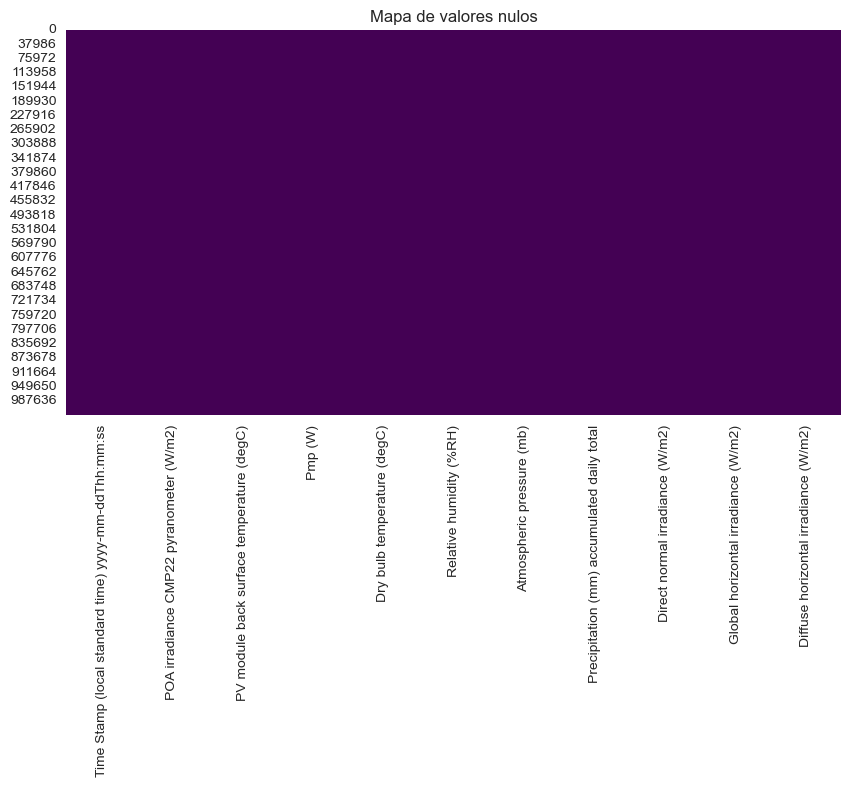

In [33]:
# 📉 Visualizar valores nulos
plt.figure(figsize=(10,5))
sns.heatmap(df_merged.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos")
plt.show()

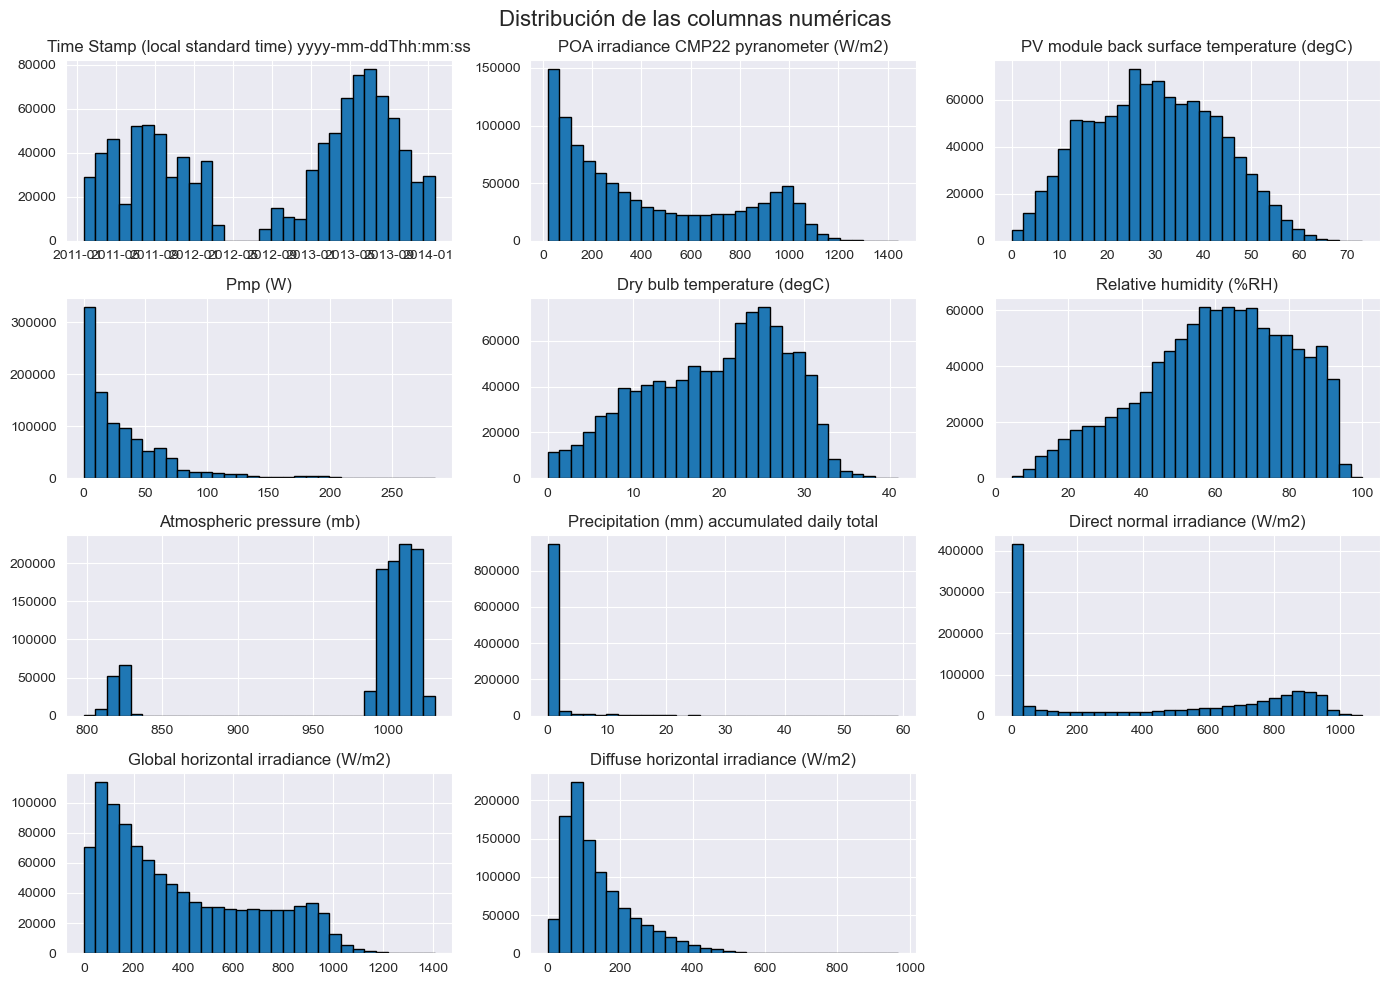

In [34]:
# 📊 Histogramas de cada columna numérica
df_merged.hist(figsize=(14, 10), bins=30, edgecolor="black", layout=(4, 3))  # Ajusta filas y columnas

plt.suptitle("Distribución de las columnas numéricas", fontsize=16)
plt.tight_layout()  # Ajusta los espacios automáticamente
plt.show() 